# problem statement

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Check for null values

car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
car_df.shape

# Dataset information

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# More understanding about the dataset

car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
import statsmodels.api as sm

# Function to get VIF (Variation Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(X_train):
    # A dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


# Data cleaning

In [7]:
# Creating a derived column for company name of cars from the column CarName

car_df.loc[:,'company'] = car_df.CarName.str.split(' ').str[0]
car_df.company = car_df.company.apply(lambda x: str(x).lower())
car_df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are a few company names which are evidently mis-spelled in the dataset like toyota has been written as toyouta. We will go ahead and repair these

In [8]:
car_df['company'].replace('maxda','mazda',inplace=True)
car_df['company'].replace('porcshce','porsche',inplace=True)
car_df['company'].replace('toyouta','toyota',inplace=True)
car_df['company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
# Dropping the CarName column

car_df.drop(columns = 'CarName', inplace=True)
car_df.fuelsystem.unique()


array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [9]:
car_df['fuelsystem'].replace('mfi','mpfi',inplace=True)
car_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

 also we can see that the following data are incorrect.

ohc hasbeen mis-spelled at places with ohcv
dohc has been mis-spelled as dohcv

In [10]:
car_df['enginetype'].replace('dohcv','dohc',inplace = True)
car_df['enginetype'].replace('ohcv','ohc',inplace = True)
car_df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Here fwd has been mis-spelled as 4wd

In [12]:
car_df['drivewheel'].replace('4wd', 'fwd', inplace = True)

Data Understanding and Preparation# 

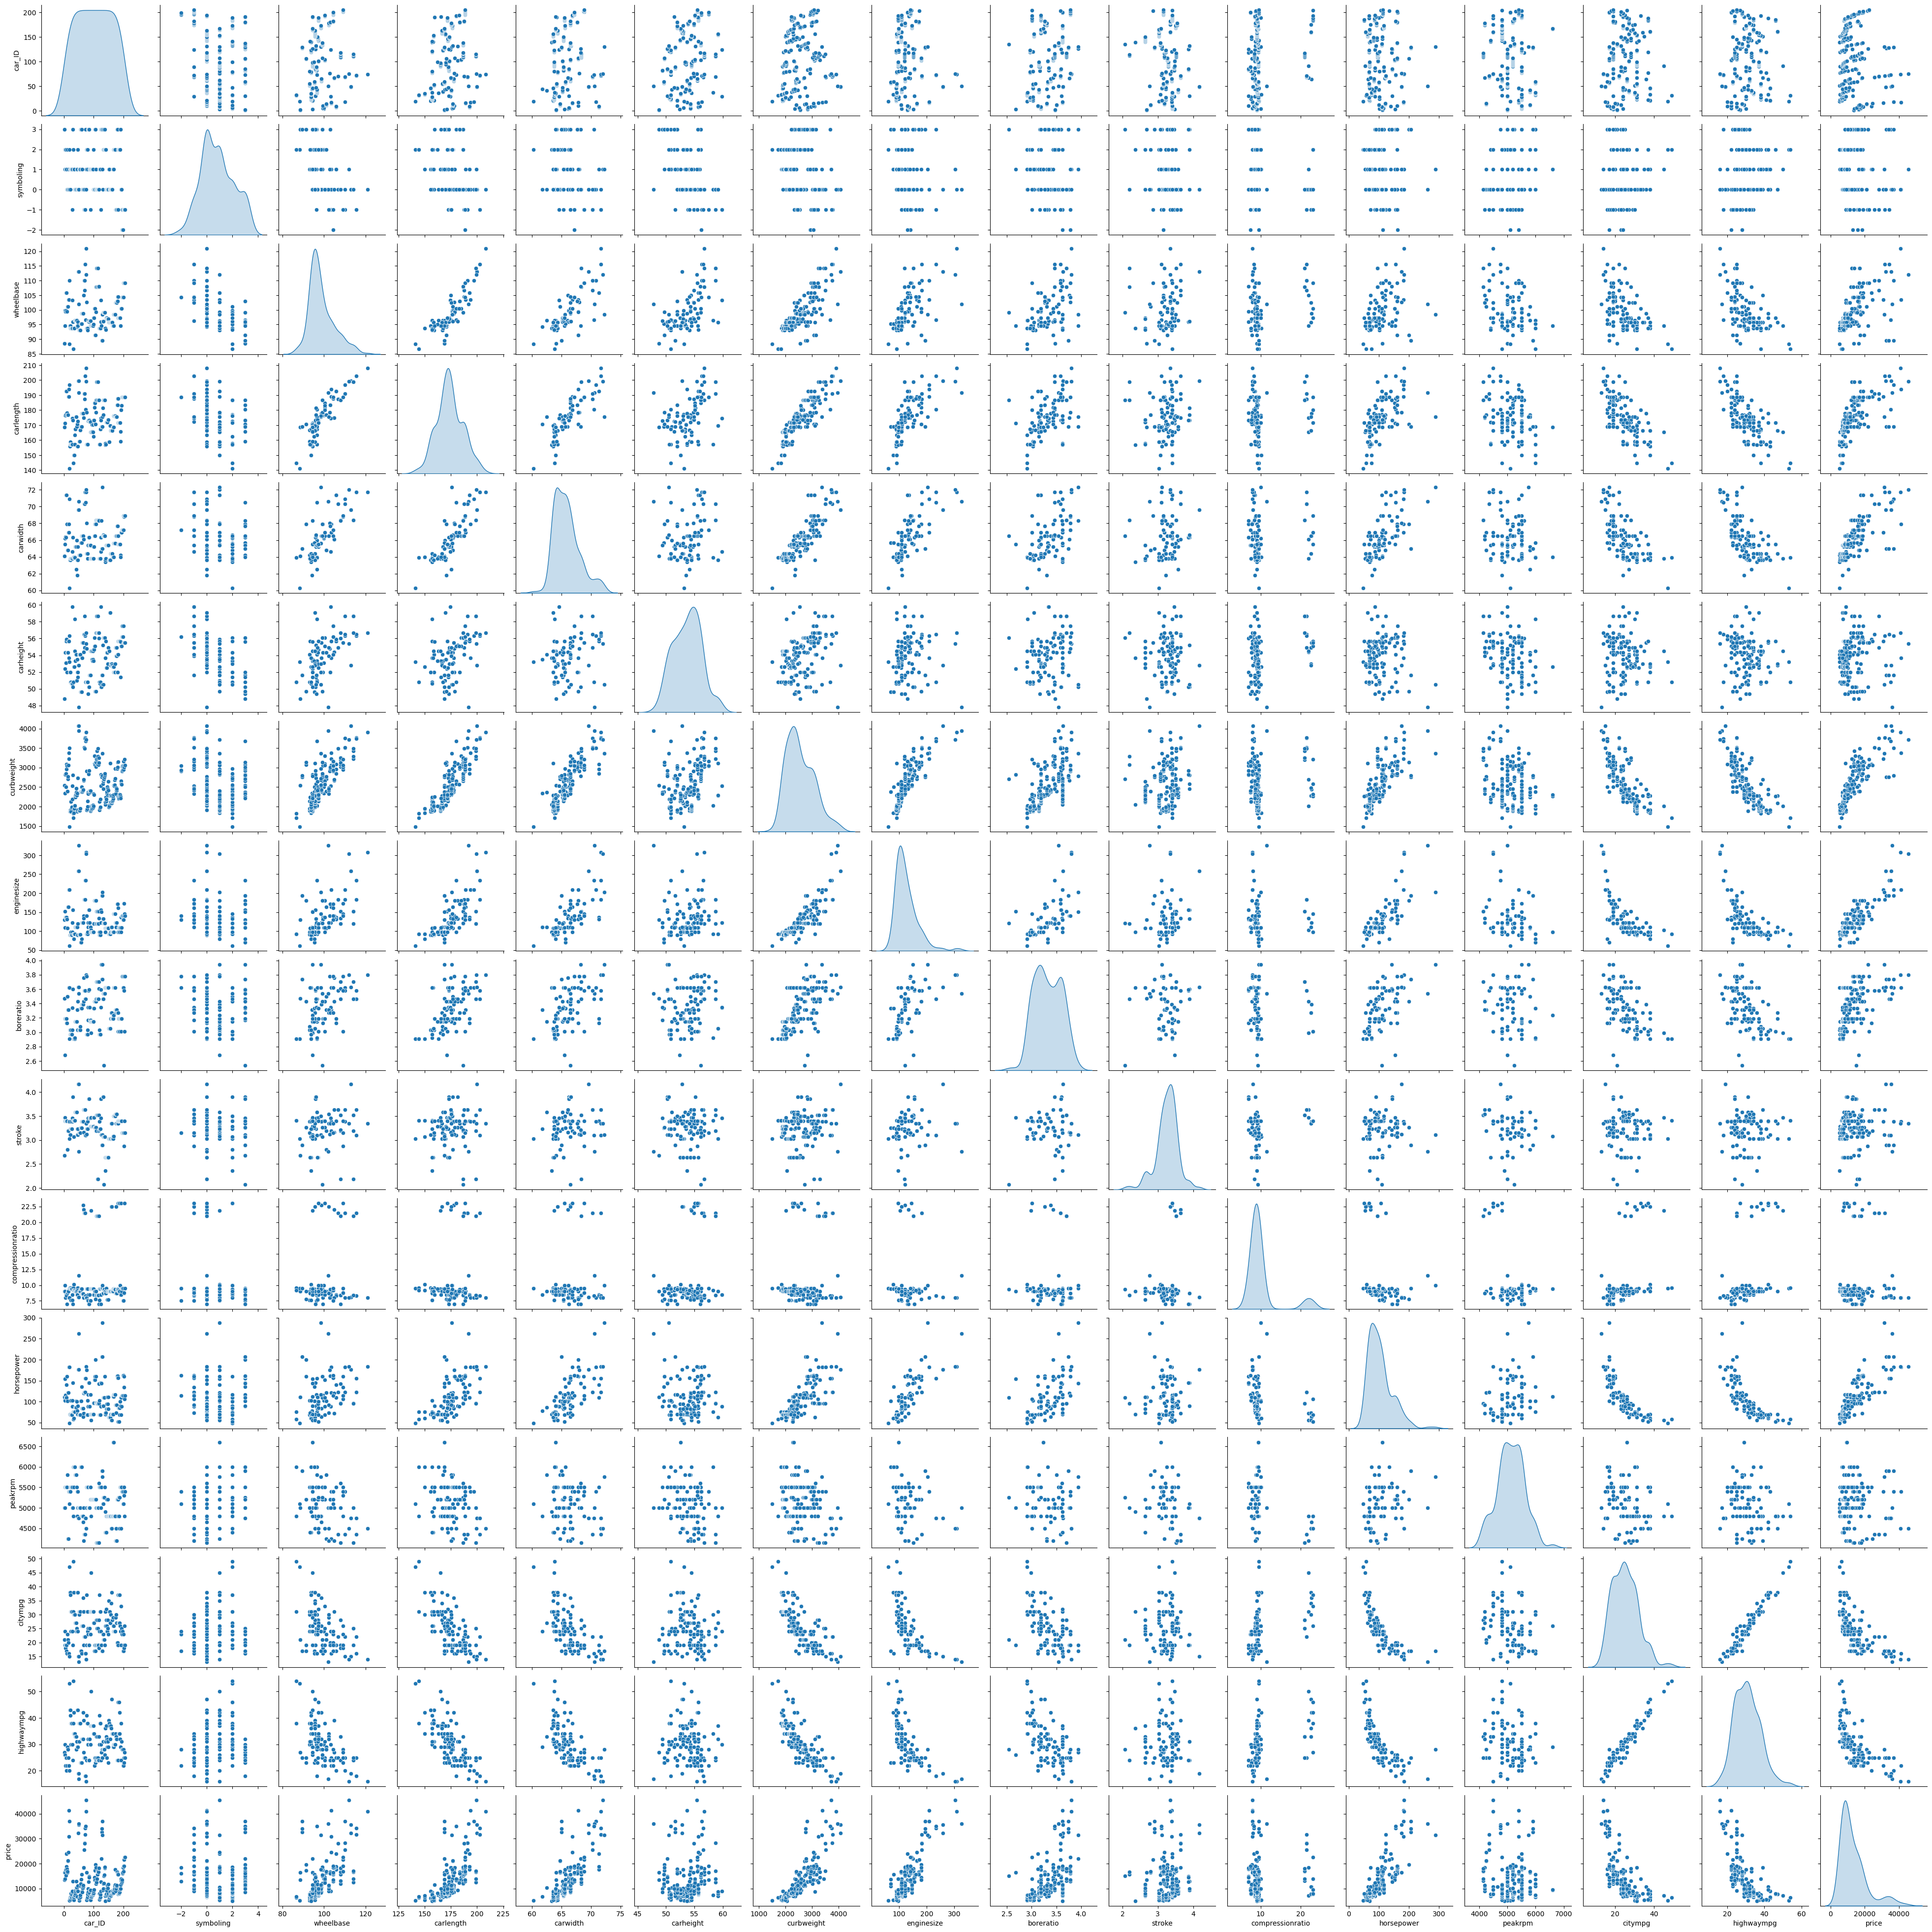

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a paiplot for the continuous variables

sns.pairplot(car_df, diag_kind="kde")
plt.show()

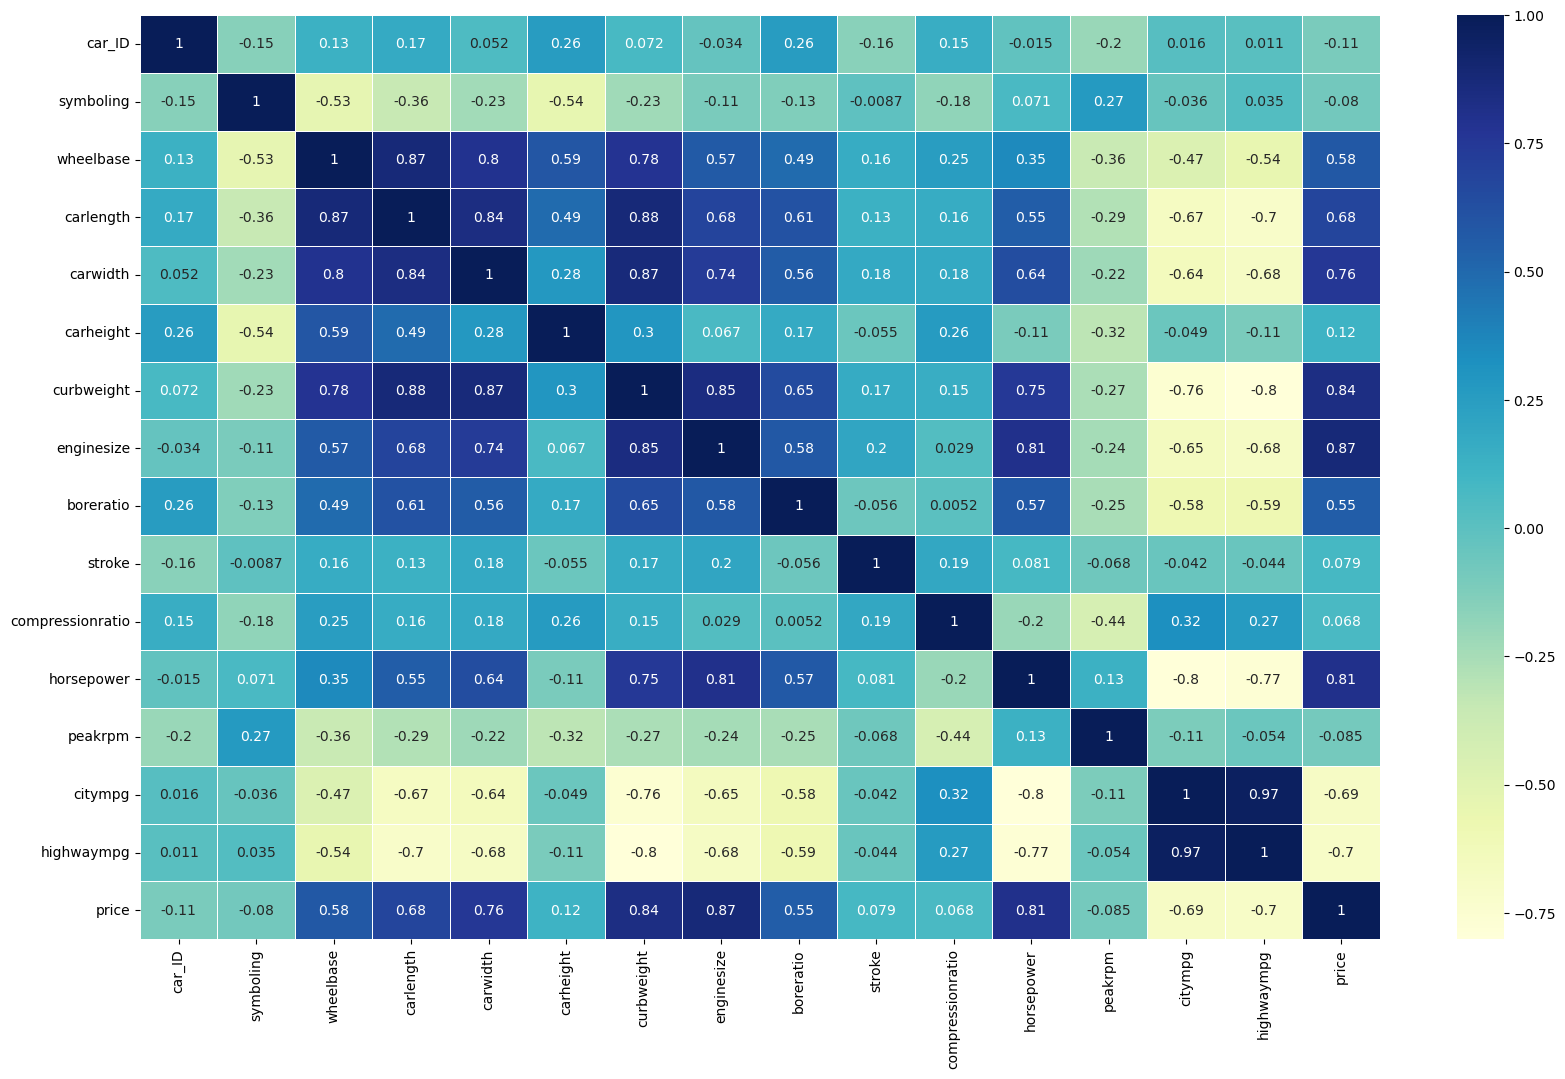

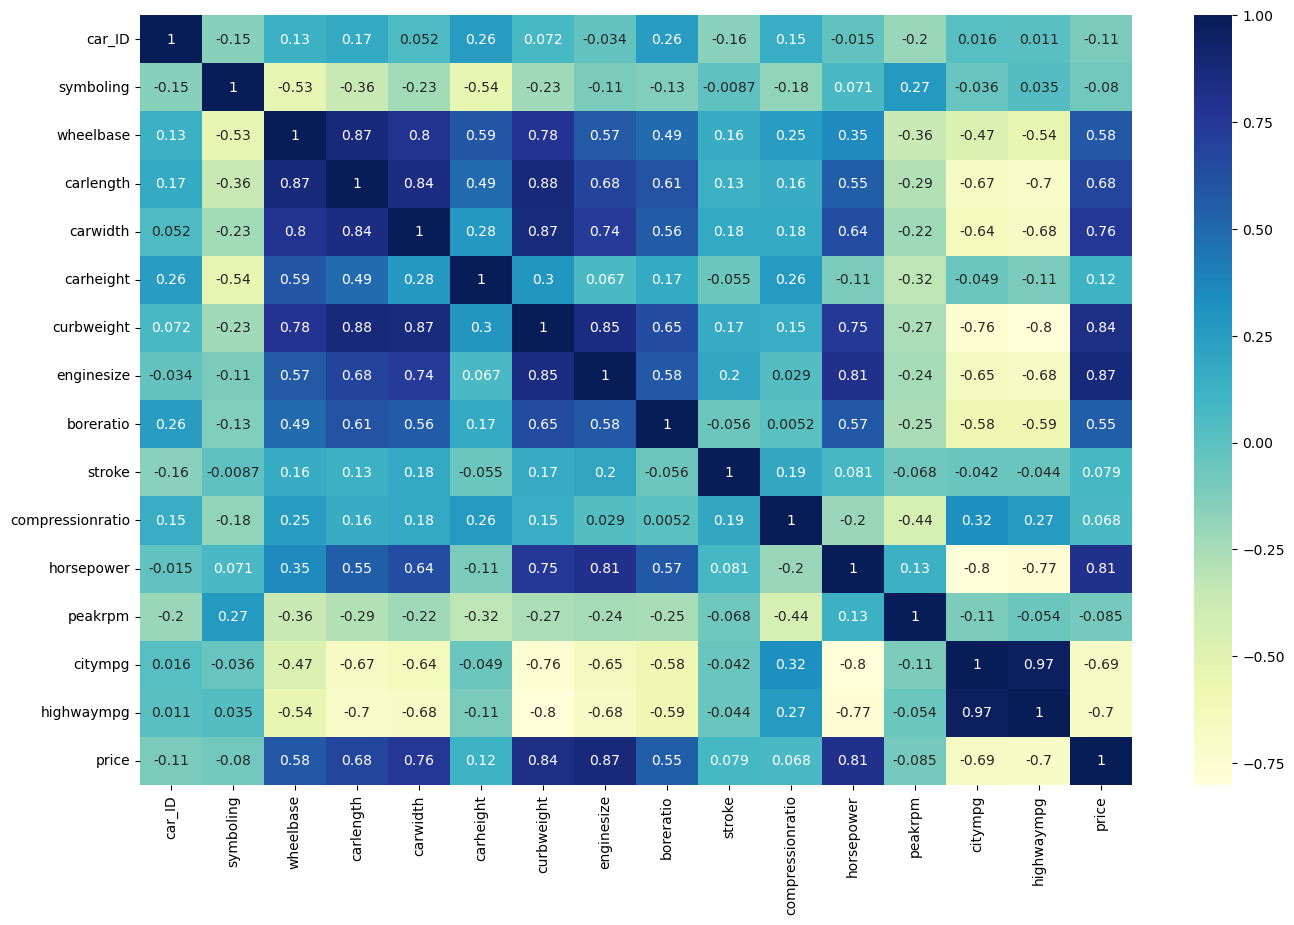

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_df.corr(), annot = True, cmap="YlGnBu")
plt.show()



The dependent variable price has a high positive co-relation with:

horsepower
enginesize
curbweight
carwidth
carlength




# Derived variable creation

In [17]:
# curbweight/enginesize

car_df.loc[:,'curbweight/enginesize'] = car_df.curbweight/car_df.enginesize
# enginesize/horsepower

car_df.loc[:,'enginesize/horsepower'] = car_df.enginesize/car_df.horsepower
# carwidth/carlength

car_df.loc[:,'carwidth/carlength'] = car_df.carwidth/car_df.carlength
# highwaympg/citympg

car_df.loc[:,'highway/city'] = car_df.highwaympg/car_df.citympg

In [18]:
# We can now drop the corresponding columns as we have taken a ratio.

car_df.drop(columns = ['enginesize','carwidth', 'carlength', 'highwaympg', 'citympg'], inplace = True)
# Checking the dataset once more

car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,...,stroke,compressionratio,horsepower,peakrpm,price,company,curbweight/enginesize,enginesize/horsepower,carwidth/carlength,highway/city
0,1,3,gas,std,two,convertible,rwd,front,88.6,48.8,...,2.68,9.0,111,5000,13495.0,alfa-romero,19.600000,1.171171,0.379739,1.285714
1,2,3,gas,std,two,convertible,rwd,front,88.6,48.8,...,2.68,9.0,111,5000,16500.0,alfa-romero,19.600000,1.171171,0.379739,1.285714
2,3,1,gas,std,two,hatchback,rwd,front,94.5,52.4,...,3.47,9.0,154,5000,16500.0,alfa-romero,18.572368,0.987013,0.382593,1.368421
3,4,2,gas,std,four,sedan,fwd,front,99.8,54.3,...,3.40,10.0,102,5500,13950.0,audi,21.440367,1.068627,0.374858,1.250000
4,5,2,gas,std,four,sedan,fwd,front,99.4,54.3,...,3.40,8.0,115,5500,17450.0,audi,20.764706,1.182609,0.375991,1.222222


In [19]:
# Dropping car_ID column as it is not useful

car_df.drop(columns = 'car_ID', inplace=True)

Data Visualization - Categorical Variable

In [20]:
car_df.symboling = car_df.symboling.map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

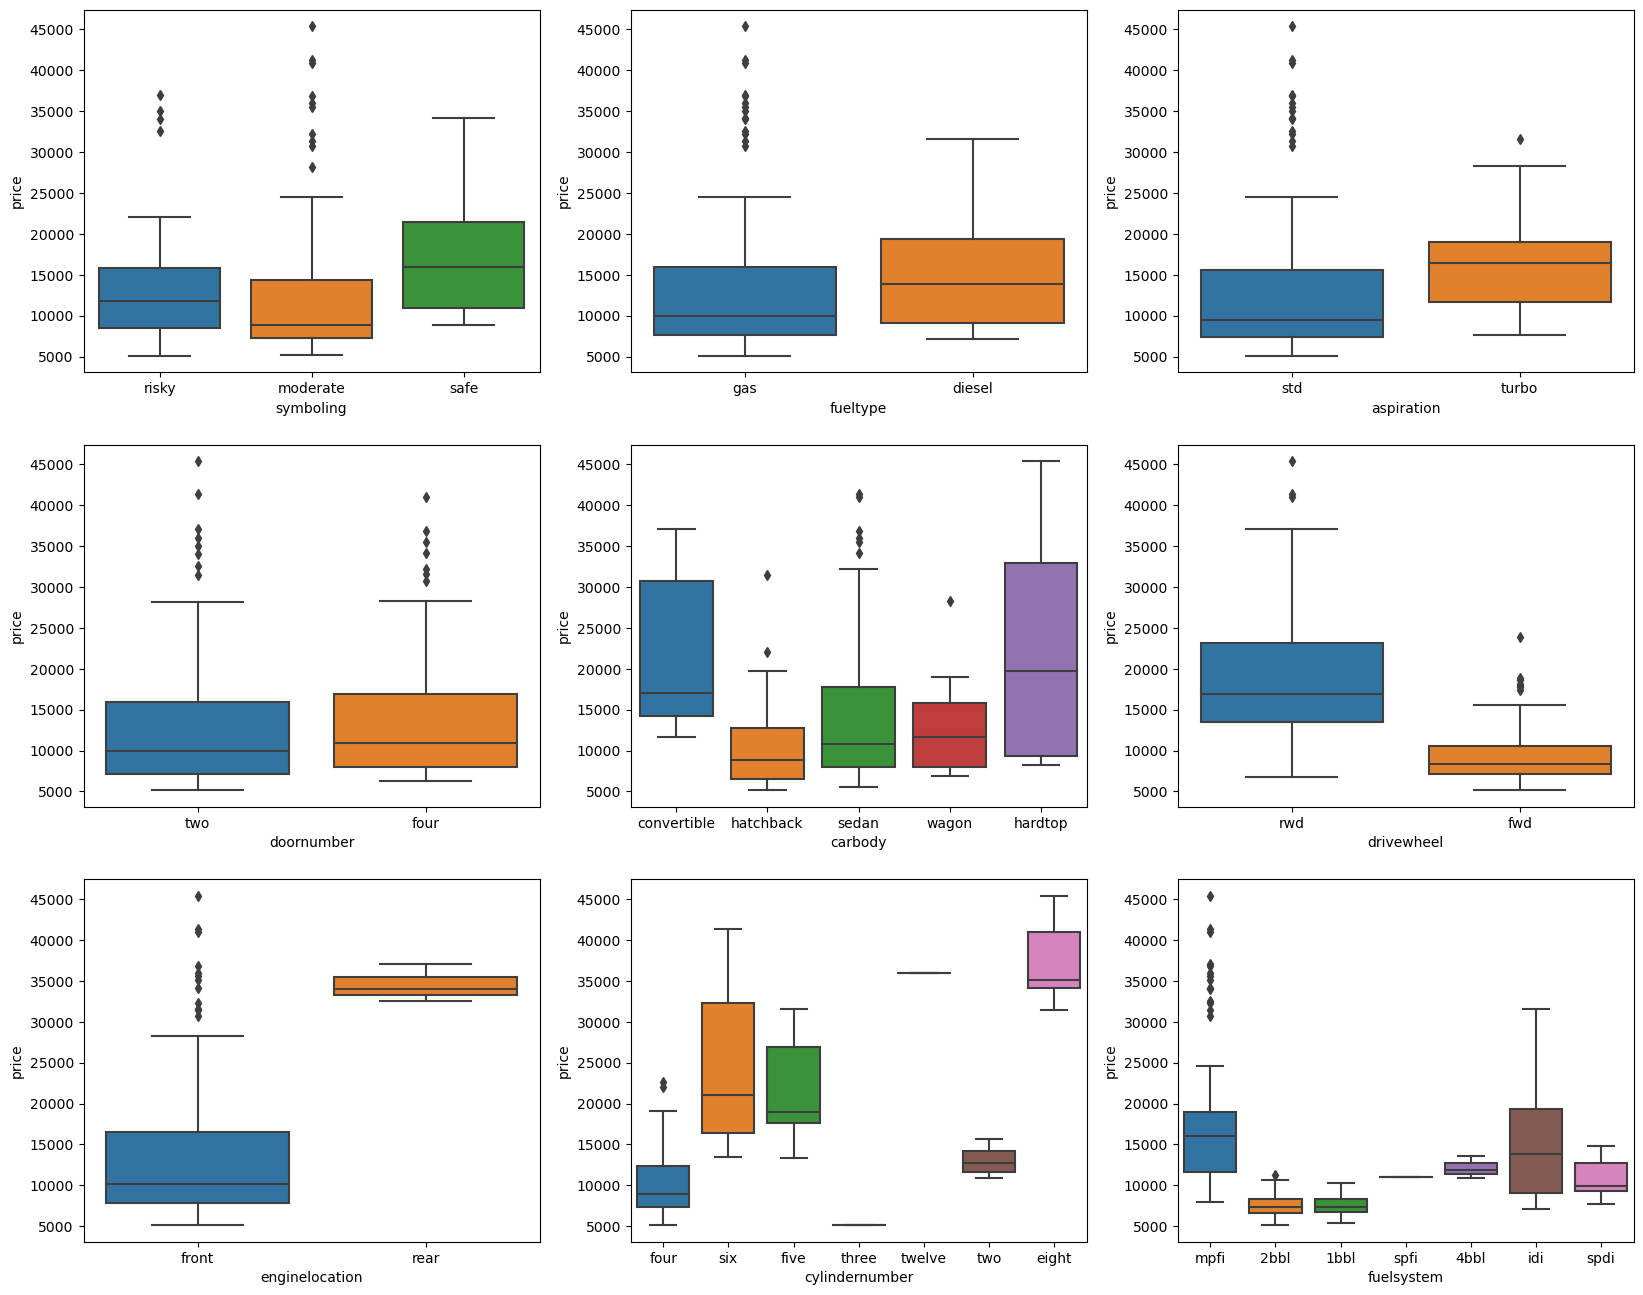

In [21]:
# Visualizing categorical data via boxplots

plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()

Cars with rear engines are clearly more priced than others.
Similiarly, there is a significant relationship among price and cylinder number and whether it has a risky or safe symbol.
However, fuel-type and number of doors does not seem to have that much effect on the price of a car.

In [22]:
# Plotting company vs price

plt.figure(figsize=(20, 16))
sns.boxplot(x = 'company', y = 'price', data = car_df, palette="Reds")

<AxesSubplot:xlabel='company', ylabel='price'>

In [23]:
median_dict = car_df.groupby(['company'])[['price']].median().to_dict()
median_dict = median_dict['price']
median_dict

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [24]:
dict_keys = list(median_dict.keys())

# Median price of category below 10000 is low, between 10000 and 20000 is med and above 20000 is high
for i in dict_keys:
    if median_dict[i] < 10000:
        median_dict[i] = 'low'
    elif median_dict[i] >= 10000 and median_dict[i] <= 20000:
        median_dict[i] = 'med'
    else:
        median_dict[i] = 'high'

median_dict

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [25]:
car_df.company = car_df.company.map(median_dict)
car_df.company.unique()

array(['med', 'high', 'low'], dtype=object)

one Hot Encoding for the categorical variables

In [26]:
car_df = pd.get_dummies(car_df, drop_first=True)
# Checking dataframe after dummy variable creation

car_df.head()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_low,company_med
0,88.6,48.8,2548,3.47,2.68,9.0,111,5000,13495.0,19.600000,...,0,0,0,0,0,1,0,0,0,1
1,88.6,48.8,2548,3.47,2.68,9.0,111,5000,16500.0,19.600000,...,0,0,0,0,0,1,0,0,0,1
2,94.5,52.4,2823,2.68,3.47,9.0,154,5000,16500.0,18.572368,...,0,0,0,0,0,1,0,0,0,1
3,99.8,54.3,2337,3.19,3.40,10.0,102,5500,13950.0,21.440367,...,0,0,0,0,0,1,0,0,0,1
4,99.4,54.3,2824,3.19,3.40,8.0,115,5500,17450.0,20.764706,...,0,0,0,0,0,1,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
print("Train data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (143, 42)
Test data shape:  (62, 42)


Feature scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
conti_vars = ['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'horsepower', 'curbweight', 'price', 'curbweight/enginesize', 'carwidth/carlength', 'highway/city', 'enginesize/horsepower']
df_train[conti_vars] = scaler.fit_transform(df_train[conti_vars])

df_train.describe()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_low,company_med
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.509004,0.407878,0.497946,0.535389,0.190787,0.227302,0.400029,0.219310,0.405582,...,0.006993,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958,0.0,0.615385,0.265734
std,0.205581,0.215378,0.211269,0.207140,0.157843,0.237181,0.165511,0.196438,0.215682,0.151818,...,0.083624,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198,0.0,0.488214,0.443276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.353982,0.245539,0.305556,0.464646,0.100000,0.091667,0.265306,0.067298,0.339434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.522124,0.355702,0.500000,0.545455,0.125000,0.191667,0.428571,0.140343,0.397537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,0.503448,0.668142,0.559542,0.682540,0.611111,0.150000,0.283333,0.551020,0.313479,0.447190,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [31]:
# X and y division

y_train = df_train.pop('price')
X_train = df_train

# Modeling

We first use sklearn's RFE(Recursive Feature Elimination) technique to reduce down the model to 10 values.

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [43]:
# Checking the statistics of the model using statsmodel library

col_rfe = X_train.columns[rfe.support_]
X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train_sm).fit()
print(lm_1.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.11e-66
Time:                        16:27:03   Log-Likelihood:                 219.24
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     123   BIC:                            -339.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [44]:
X_train.drop(columns='carbody_hardtop', inplace=True)

In [45]:
X_train_sm = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train_sm).fit()
print(lm_2.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     106.6
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.10e-66
Time:                        16:27:38   Log-Likelihood:                 217.27
No. Observations:                 143   AIC:                            -396.5
Df Residuals:                     124   BIC:                            -340.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

wheelbase came out to have a high p-value. Removing and rebuilding model.

In [46]:
X_train.drop(columns='wheelbase', inplace=True)

In [47]:
X_train_sm = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
print(lm_3.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     109.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.53e-66
Time:                        16:28:27   Log-Likelihood:                 214.89
No. Observations:                 143   AIC:                            -393.8
Df Residuals:                     125   BIC:                            -340.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

carbody_sedan has a high p-value and a VIF above 5. So it becomes a very good candidate to be dropped

In [48]:
X_train.drop(columns='carbody_sedan', inplace=True)

In [49]:
X_train_sm = sm.add_constant(X_train)
lm_4 = sm.OLS(y_train, X_train_sm).fit()
print(lm_4.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     114.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           5.54e-67
Time:                        16:29:16   Log-Likelihood:                 213.30
No. Observations:                 143   AIC:                            -392.6
Df Residuals:                     126   BIC:                            -342.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

this point we see that all the p values are below 0.05 and the VIFs are also below 5. So we can be pretty confident that this is a good model.

We also see that lm_4 model has an R-squared value of 0.926 and an adjusted R-squared value of 0.922

# Residual Analysis

In [51]:
y_train_price = lm_4.predict(X_train_sm)

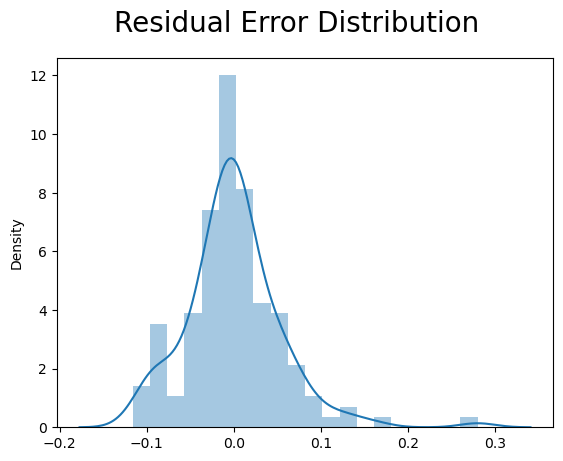

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residual Error Distribution', fontsize = 20)
plt.show()

On testing data

In [53]:
# We are scaling the testing set with the already existing scaler object which has been fitted on the train dataset

df_test[conti_vars] = scaler.transform(df_test[conti_vars])

df_test.describe()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_low,company_med
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559663,0.428470,0.556580,0.544314,0.209375,0.248858,0.393351,0.239439,0.379273,...,0.0,0.0,0.258065,0.0,0.112903,0.516129,0.048387,0.016129,0.596774,0.290323
std,0.212861,0.215811,0.179488,0.228484,0.160738,0.273690,0.163376,0.192092,0.233076,0.126288,...,0.0,0.0,0.441142,0.0,0.319058,0.503819,0.216335,0.127000,0.494550,0.457617
min,0.000000,0.141593,0.128394,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.007763,0.004729,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.384956,0.305275,0.404762,0.484848,0.093750,0.107292,0.265306,0.092342,0.317447,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.588496,0.406129,0.563492,0.585859,0.125000,0.218750,0.346939,0.158991,0.405467,...,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.570690,0.699115,0.564876,0.746032,0.641414,0.150000,0.295833,0.540816,0.317243,0.461491,...,0.0,0.0,0.750000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.182759,1.061947,0.935609,0.888889,0.863636,1.000000,0.662500,1.000000,1.112855,0.615282,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# X and y division

y_test = df_test.pop('price')
X_test = df_test

In [55]:
X_test = X_test[col_rfe]
X_test.drop(columns=['carbody_sedan', 'wheelbase', 'carbody_hardtop'], inplace=True) 
# Dropping columns which we dropped while building the model after RFE
X_test_sm = sm.add_constant(X_test)
y_pred = lm_4.predict(X_test_sm)

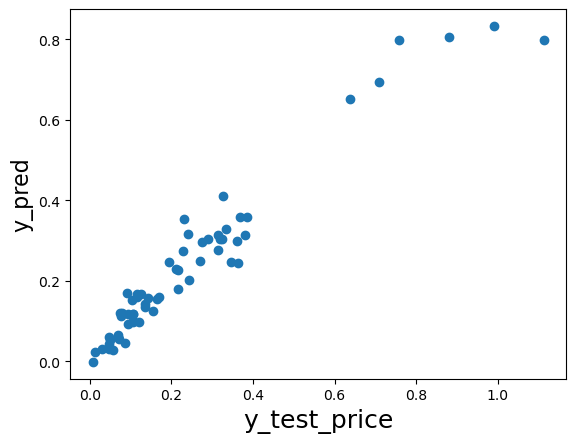

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test_price', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Model Evaluation

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.06110143209808298
Model r2_score: 0.930149517336069


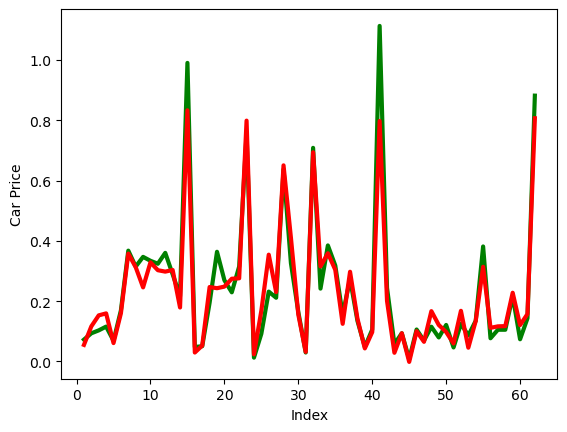

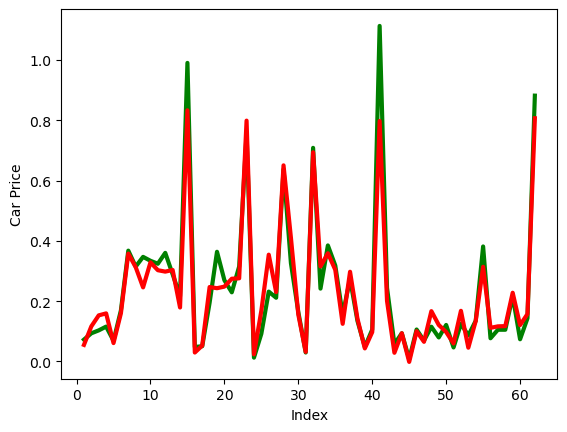

In [62]:
c = [i for i in range(1,63)]

fig = plt.figure()
plt.plot(c,y_test,color="green",linewidth=3,linestyle='-')
plt.plot(c,y_pred,color="red",linewidth=3,linestyle='-')
plt.ylabel('Car Price')
plt.xlabel('Index')
plt.show()

the final model has the following features and coefficients:

Feature Name	Co-efficient
curbweight	0.4328
horsepower	0.2874
carbody_hatchback	-0.0232
carbody_wagon	-0.0454
enginelocation_rear	0.1697
company_low	-0.2831
company_med	-0.2307

# Final Analysis and Recommendations

Fueltype - Diesel powered cars tend to be very slightly expensive than their petrol counterparts. This could be because diesel is less expensive than petrol and thus a diesel car willcost less over time.

Engine Location - Cars with engines on the rear are significantly more expensive than the cars with engine on the front. This is mainly because the expensive sports cars have engine towards the back for better balance at high speeds and aerodynamic enhancement.